In [1]:
%matplotlib inline

# 1. PseudoCode

ICA separates a source signal into additive subcomponents that are maximally independent. This means the variation of each subcomponent over time does not depent on the variation of other subcomponents. The output of FastICA is a matrix of independent components and a weight matrix.

The data must also we whitened to minimize noise before completing an independent component analysis. Whitening is the process of removing noise with a uniform frequency spectrum over a wide range of frequencies.

**Input:** 
1. Matrix of integers (n x m) from source signal
2. Each row (n) contains a time series of the voltage differences between source projections to a single electrode relative to a reference electrode
4. Hundreds of thousands of columns (m) (Number of time points at which electrical potential data is recorded)

**Output:**
1. Matrix of integers (n x m) of independent components 
2. Each row contains (n) a time series of the activity of one component - spatially filtered from the channel data.
3. Weight matrix (n x n) which can be multiplied by the independent component matrix to receive the original signal

**Function Name**

FastICA

# 2. Describe two simulation settings by writing distributions to test the code

**Example where algorithm will do well**
Generate a 2 x 10 matrix for the independent components. Row 1 satisfies sin(2 * pi * x). Row 2 satisfies sign(sin(pi * x).
Generate a 2 x 2 weight matrix of random values.
Multiply the weight matrix by the independent component matrix to receive a "Original Signal" matrix.
Now, run ICA on the original signal matrix.
The output of the ICA should be 2 source signals.

**Example where will not do well, but a different algorithm will do well**
This ICA will not work well when there are source signals that are not independent of eachother. EEG data collected from each electrode is not completely independent of data collected by another electrode because EEG collects data on a large cluster of neurons. Therefore, signals from neuron clusters overlap between electrodes. This can be produced by making row 1 of the independent component matrix satisfy sin(x), and row 2 satisfying 5sin(x).


# 3. Visualizations for qualitatively evaluating performance

We can qualitatively evaluate performance by graphing the independent components, and then graphing the result of FastICA run on the signal produced when a weight matrix is multiplied by the independent components matrix. Before the data is graphed, the original independent components, as well as the ICA produced independent components MUST be Standardized. The more closely the two graphs match, the more accurately FastICA could identify the independent components.
Note: Due to the nature of ICA, it is possible for the plots to look identical, but have inverted signs.

# 4. Metrics for quantitatively evaluating performance

To quantitatively evalualte performance, we must find the difference in value between component X~ij~ of the independent component matrix we created and the component X~ij~ of the indepdentent component matrix produced by running FastICA. We then square the result of each of these differences, and add them together. The closer the resulting value is to 0, the better the ICA worked.

# 5. Write code generating simulated data

In [2]:
%matplotlib inline

import numpy as np
import random
from numpy import matrix
from numpy import linalg
import matplotlib.pyplot as plt
from scipy import signal
import h5py

from sklearn.decomposition import FastICA, PCA

n_samples = 2000
time = np.linspace(0, 10, n_samples)
ind_component1 = np.sin(2 * np.pi * time) # Signal 1 : sin signal
ind_component2 = np.sign(np.sin(np.pi * time)) # Signal 2 : square signal
ind_component_matrix = np.c_[ind_component1,ind_component2]

weight_matrix = np.array([[1, 1], [0.5, 2]])
combined_signal = np.dot(ind_component_matrix, weight_matrix.T)

# 6. Plot simulated data

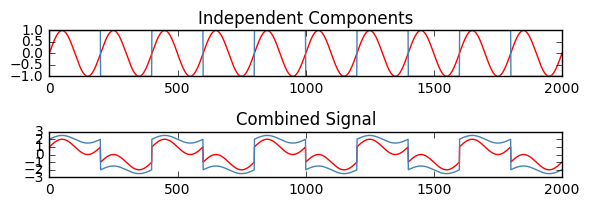

In [3]:
models = [ind_component_matrix, combined_signal]
names = ['Independent Components',
         'Combined Signal']
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.tight_layout()
plt.show()

# 7. Write algorithm code

In [4]:
ica = FastICA(n_components=2)
ica_ind_component_matrix = ica.fit_transform(combined_signal)

# 8. Write qualitative evaluation code

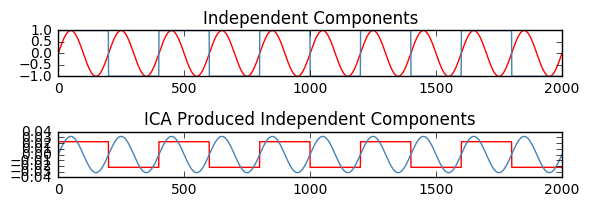

In [5]:
models = [ind_component_matrix, ica_ind_component_matrix]
names = ['Independent Components',
         'ICA Produced Independent Components']
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.tight_layout()
plt.show()

The scale is off because of different weight matricies used. Therefore, we must standardize the data.

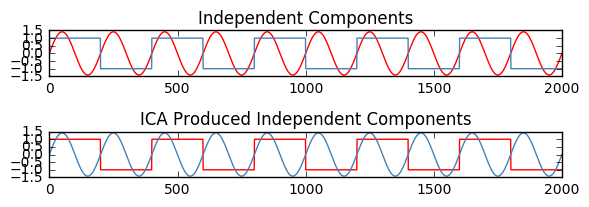

In [6]:
# Standardize original independent component matrix
standardized_ind_component_matrix = ind_component_matrix
standardized_ind_component_matrix /= standardized_ind_component_matrix.std(axis=0) 

# Standardize ICA produced independent component matrix
standardized_ica_ind_component_matrix = ica_ind_component_matrix
standardized_ica_ind_component_matrix /= standardized_ica_ind_component_matrix.std(axis=0)

models = [standardized_ind_component_matrix, standardized_ica_ind_component_matrix]
names = ['Independent Components',
         'ICA Produced Independent Components']
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.tight_layout()
plt.show()

As noted earlier, due to the to the nature of ICA, the plots should look identical, however, their signs may be flipped. To adjust for this, we multiply the relavent ICA produced component matrix by -1.
#### This step is necessary on a trial by trial basis. Plots must first be generated and observed, before implementing this step

In [7]:
ica_ind_component_matrix[:,1] *= -1

# Standardize ICA produced independent component matrix
standardized_ica_ind_component_matrix = ica_ind_component_matrix
standardized_ica_ind_component_matrix /= standardized_ica_ind_component_matrix.std(axis=0)

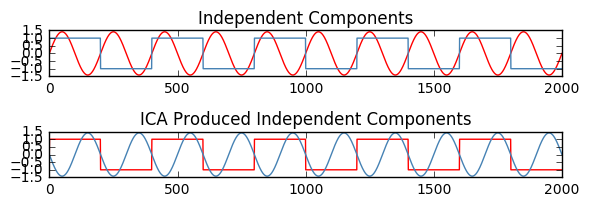

In [8]:
models = [standardized_ind_component_matrix, standardized_ica_ind_component_matrix]
names = ['Independent Components',
         'ICA Produced Independent Components']
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.tight_layout()
plt.show()

# 9. Write quantitative evaluation code
Compute Sum of Positive Differences
Note: We take the absolute value of each matrix before subtraction to take into consideration the sign flip - an inherent property of ICA.

The smaller the average difference across all samples, the closer the result of ICA is to the expected value

In [9]:
positive_differences = np.absolute(standardized_ind_component_matrix) - np.absolute(standardized_ica_ind_component_matrix)
positive_differences = np.absolute(positive_differences)

#We Divide by n_samples to find the average difference in values (between expected and resulting values) across all samples
average_difference = np.sum(positive_differences) / n_samples
average_difference

0.74566051659279997

# 10. Run quantitatively evaluate simulations (use >= 10 repititions randomizing simulation parameters, plots all results)

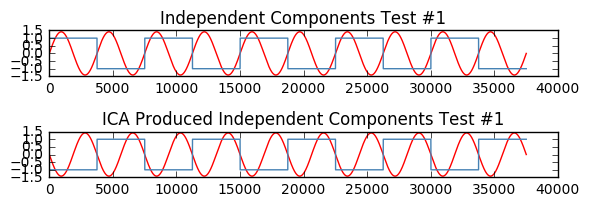

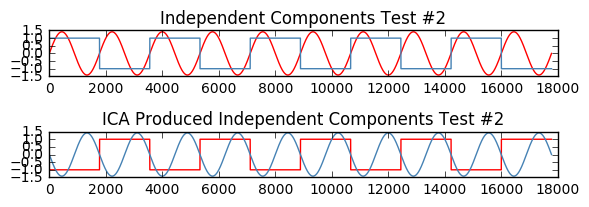

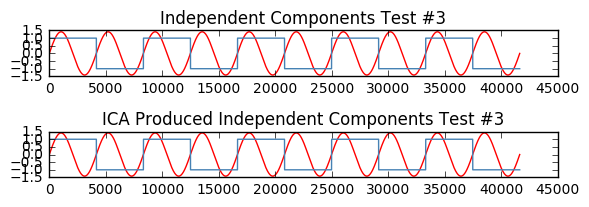

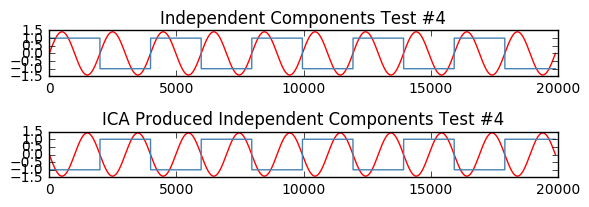

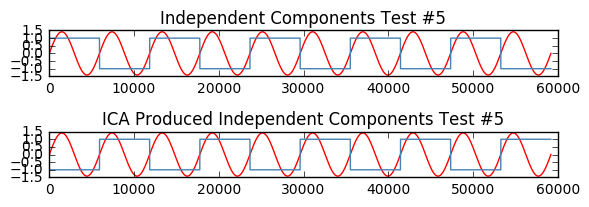

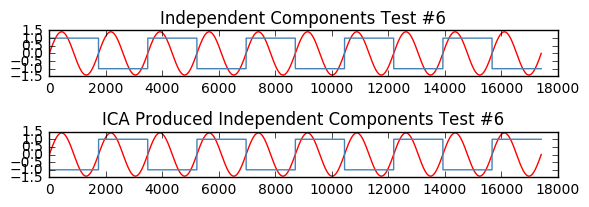

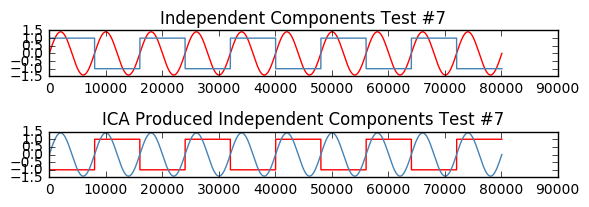

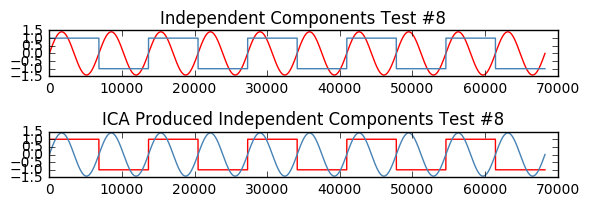

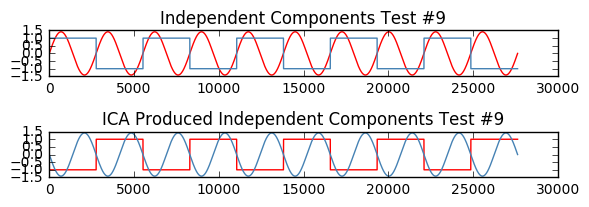

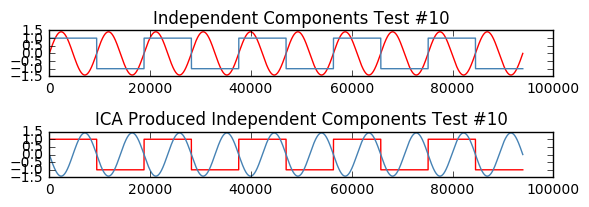

In [10]:
ad_values = np.empty([10])
n_samples_values = np.empty([10])
x_axis = np.arange(1, 11, 1)
for x in range(10):
    n_samples = random.randint(10000,100000)
    time = np.linspace(0, 10, n_samples)
    ind_component1 = np.sin(2 * np.pi * time) # Signal 1 : sin signal
    ind_component2 = np.sign(np.sin(np.pi * time)) # Signal 2 : square signal
    ind_component_matrix = np.c_[ind_component1,ind_component2]
    weight_matrix = np.array([[1, 1], [0.5, 2]])
    combined_signal = np.dot(ind_component_matrix, weight_matrix.T)
    ica = FastICA(n_components=2)
    ica_ind_component_matrix = ica.fit_transform(combined_signal)
    # Standardize original independent component matrix
    standardized_ind_component_matrix = ind_component_matrix
    standardized_ind_component_matrix /= standardized_ind_component_matrix.std(axis=0) 
    # Standardize ICA produced independent component matrix
    standardized_ica_ind_component_matrix = ica_ind_component_matrix
    standardized_ica_ind_component_matrix /= standardized_ica_ind_component_matrix.std(axis=0)
    #Calculate Positive Differences
    positive_differences = np.absolute(standardized_ind_component_matrix) - np.absolute(standardized_ica_ind_component_matrix)
    positive_differences = np.absolute(positive_differences)
    average_difference = np.sum(positive_differences) / n_samples
    ad_values[x] = average_difference
    n_samples_values[x] = n_samples
    models = [standardized_ind_component_matrix, standardized_ica_ind_component_matrix]
    names = ['Independent Components Test #' + str(x+1),
         'ICA Produced Independent Components Test #' + str(x+1)]
    colors = ['red', 'steelblue']

    for ii, (model, name) in enumerate(zip(models, names), 1):
        plt.subplot(4, 1, ii)
        plt.title(name)
        for sig, color in zip(model.T, colors):
            plt.plot(sig, color=color)

    plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
    plt.tight_layout()
    plt.show()


# 11. Quantitatively evaluate via a plot of quantitative evaluation for each repitition in both cases

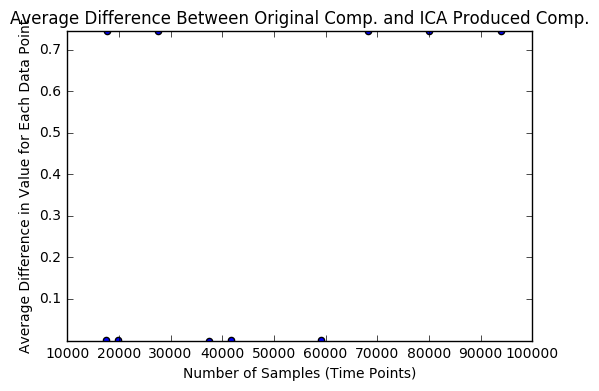

In [11]:
y_max = np.amax(ad_values) 
y_min = np.amin(ad_values) 
plt.scatter(n_samples_values, ad_values)
plt.title('Average Difference Between Original Comp. and ICA Produced Comp.')
plt.ylabel('Average Difference in Value for Each Data Point')
plt.xlabel('Number of Samples (Time Points)')
plt.axis([10000, 100000, y_min, y_max])
plt.show()

# 12. Report p-value using meaningful test statistic to determine whether the alg worked better than chance in the 2 cases.

### Independent Components

In [12]:
count_random_wins = 0
n_samples = 20000
time = np.linspace(0, 10, n_samples)
ind_component1 = np.sin(2 * np.pi * time) # Signal 1 : sin signal
ind_component2 = np.sign(np.sin(np.pi * time)) # Signal 2 : square signal
ind_component_matrix = np.c_[ind_component1,ind_component2]
weight_matrix = np.array([[1, 1], [0.5, 2]])
combined_signal = np.dot(ind_component_matrix, weight_matrix.T)
# Standardize original independent component matrix
standardized_ind_component_matrix = ind_component_matrix
standardized_ind_component_matrix /= standardized_ind_component_matrix.std(axis=0) 

n_test_iterations = 1000

for x in range(n_test_iterations):
    #Compute Positive Difference for FastICA
    ica = FastICA(n_components=2)
    ica_ind_component_matrix = ica.fit_transform(combined_signal)
    # Standardize ICA produced independent component matrix
    standardized_ica_ind_component_matrix = ica_ind_component_matrix
    standardized_ica_ind_component_matrix /= standardized_ica_ind_component_matrix.std(axis=0)
    #Calculate Positive Differences
    positive_differences = np.absolute(standardized_ind_component_matrix) - np.absolute(standardized_ica_ind_component_matrix)
    positive_differences = np.absolute(positive_differences)
    ica_average_difference = np.sum(positive_differences) / n_samples

    #Compute Positive Difference for Random
    random_weight_matrix = np.random.rand(2,2)
    random_component_signal = np.dot(combined_signal, random_weight_matrix.T)
    # Standardize ICA produced independent component matrix
    standardized_random_ind_component_matrix = random_component_signal
    standardized_random_ind_component_matrix /= standardized_random_ind_component_matrix.std(axis=0)
    #Calculate Positive Differences
    positive_differences = np.absolute(standardized_ind_component_matrix) - np.absolute(standardized_random_ind_component_matrix)
    positive_differences = np.absolute(positive_differences)
    random_average_difference = np.sum(positive_differences) / n_samples

    if ( random_average_difference < ica_average_difference ):
       random_wins = 1
    else: 
       random_wins = 0
        
    count_random_wins = count_random_wins + random_wins

p_value = (count_random_wins / n_test_iterations)
print('Testing ' + str(n_test_iterations) + ' iterations on independent components, we receive a p-value of: ' + str(p_value))

Testing 1000 iterations on independent components, we receive a p-value of: 0.212


### Dependent Components

In [13]:
count_random_wins = 0
n_samples = 20000
time = np.linspace(0, 10, n_samples)
ind_component1 = np.sin(2 * np.pi * time) # Signal 1 : sin signal
ind_component2 = 5 * np.sin(2 * np.pi * time) # Signal 2 : square signal
ind_component_matrix = np.c_[ind_component1,ind_component2]
weight_matrix = np.array([[1, 1], [0.5, 2]])
combined_signal = np.dot(ind_component_matrix, weight_matrix.T)
# Standardize original independent component matrix
standardized_ind_component_matrix = ind_component_matrix
standardized_ind_component_matrix /= standardized_ind_component_matrix.std(axis=0) 

n_test_iterations = 1000

for x in range(n_test_iterations):
    #Compute Positive Difference for FastICA
    ica = FastICA(n_components=2)
    ica_ind_component_matrix = ica.fit_transform(combined_signal)
    # Standardize ICA produced independent component matrix
    standardized_ica_ind_component_matrix = ica_ind_component_matrix
    standardized_ica_ind_component_matrix /= standardized_ica_ind_component_matrix.std(axis=0)
    #Calculate Positive Differences
    positive_differences = np.absolute(standardized_ind_component_matrix) - np.absolute(standardized_ica_ind_component_matrix)
    positive_differences = np.absolute(positive_differences)
    ica_average_difference = np.sum(positive_differences) / n_samples

    #Compute Positive Difference for Random
    random_weight_matrix = np.random.rand(2,2)
    random_component_signal = np.dot(combined_signal, random_weight_matrix.T)
    # Standardize ICA produced independent component matrix
    standardized_random_ind_component_matrix = random_component_signal
    standardized_random_ind_component_matrix /= standardized_random_ind_component_matrix.std(axis=0)
    #Calculate Positive Differences
    positive_differences = np.absolute(standardized_ind_component_matrix) - np.absolute(standardized_random_ind_component_matrix)
    positive_differences = np.absolute(positive_differences)
    random_average_difference = np.sum(positive_differences) / n_samples

    if ( random_average_difference < ica_average_difference ):
       random_wins = 1
    else: 
       random_wins = 0
        
    count_random_wins = count_random_wins + random_wins

p_value = (count_random_wins / n_test_iterations)
print('Testing ' + str(n_test_iterations) + ' iterations on dependent components, we receive a p-value of: ' + str(p_value))

Testing 1000 iterations on dependent components, we receive a p-value of: 1.0



# 13. Document the degree to which your predictions of which situations the algorithm would perform well or not, were accurate, and modify understanding as appropriate. pay particular attention to limitations of the evalation setting (simulation design and assessment criteria)

The algorithm worked better than random about 80% of the time when separating a sin wave from a square wave (independent component).

The algorithm did not work at all when separating a sin wave from a 5 * sin wave (dependent components).

These results are as expected.

# 14. Get 1 real data in exact same format as the simulation

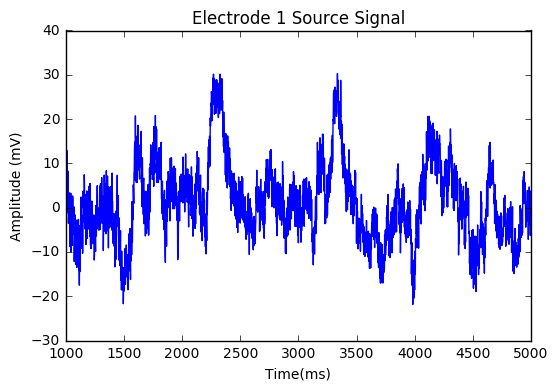

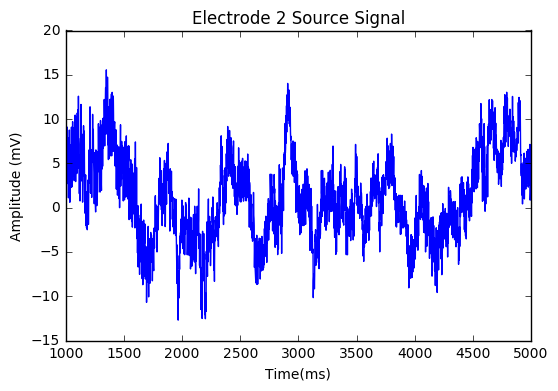

In [14]:
#Number of time steps
n_samples = 2000

#Downsampling the Time steps (Value of 1 means no time downsampling)
downsample_time = 1

#500th data point = 1000 ms
start_time_step = 500
end_time_step = start_time_step + downsample_time*n_samples
time_step_increment = downsample_time

#500Hz sampling rate
samples_per_ms = 0.5

#Time scaling factor for x axis
time_scaling_factor = np.reciprocal(samples_per_ms)

f = h5py.File('A00051826/full_A00051826_01.mat', 'r')
data = np.array((f['result']['data']))
electrode01_range = data[start_time_step:end_time_step:time_step_increment,1];
electrode02_range = data[start_time_step:end_time_step:time_step_increment,2];
time_step_axis = np.arange(start=time_scaling_factor*start_time_step, stop=time_scaling_factor*end_time_step, step=time_scaling_factor*time_step_increment)

plt.plot(time_step_axis, electrode01_range)
plt.title('Electrode 1 Source Signal')
plt.ylabel('Amplitude (mV)')
plt.xlabel('Time(ms)')
plt.show()

plt.plot(time_step_axis, electrode02_range)
plt.title('Electrode 2 Source Signal')
plt.ylabel('Amplitude (mV)')
plt.xlabel('Time(ms)')
plt.show()


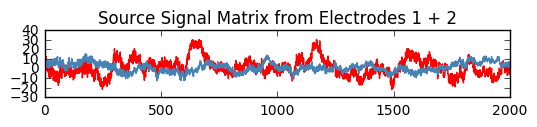

In [15]:
source_signal_matrix = np.c_[electrode01_range,electrode02_range]
models = [source_signal_matrix]
names = ['Source Signal Matrix from Electrodes 1 + 2']
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
plt.show()

# 15. Predict performance accuracy of the algorithm

Being that we have a large number of samples, we would conclude that the algorithm will work better than if there were fewer samples.
Since there are a much larger amount of independent components, this will impact the results of the algorithm.

Note: for future, it would be a good idea to run quantitative evaluation simulations with increasing number of components, Since the simulations run earlier had varying number of samples, but identical number of components.

# 16. Run exact same code on real data, generating estimates, qualitative and quantitative results.

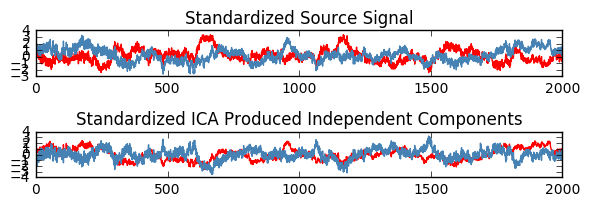

In [16]:
ica = FastICA(n_components=2)
ica_ind_component_real_data = ica.fit_transform(source_signal_matrix)

# Standardize Source Signal
standardized_source_signal_real_data = source_signal_matrix
standardized_source_signal_real_data /= standardized_source_signal_real_data.std(axis=0)


# Standardize ICA produced independent components
standardized_ica_ind_component_real_data = ica_ind_component_real_data
standardized_ica_ind_component_real_data /= standardized_ica_ind_component_real_data.std(axis=0)

models = [standardized_source_signal_real_data, standardized_ica_ind_component_real_data]
names = ['Standardized Source Signal',
         'Standardized ICA Produced Independent Components']
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.tight_layout()
plt.show()

# Run on larger set of data

(2000, 14)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:290: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')
C:\Program Files\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


(14, 14)
[[0 1]]


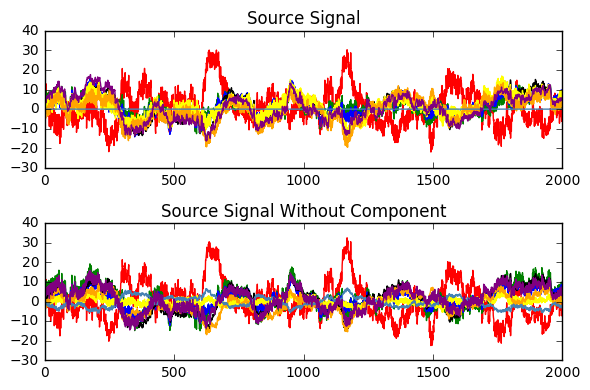

In [127]:
#Number of time steps
n_samples = 2000

#Downsampling the Time steps (Value of 1 means no time downsampling)
downsample_time = 1

#500th data point = 1000 ms
start_time_step = 500
end_time_step = start_time_step + downsample_time*n_samples
time_step_increment = downsample_time

#500Hz sampling rate
samples_per_ms = 0.5

#Time scaling factor for x axis
time_scaling_factor = np.reciprocal(samples_per_ms)

#X-Axis
time_step_axis = np.arange(start=time_scaling_factor*start_time_step, stop=time_scaling_factor*end_time_step, step=time_scaling_factor*time_step_increment)

#Number of electrodes to import + 1
#ex. Number of electrodes = 4
#    n_components = 5
n_components = 15

#FastICA Parameters
max_iter = 2000
tol = 0.001
whiten = False

f = h5py.File('A00051826/full_A00051826_01.mat', 'r')
data = np.array((f['result']['data']))

electrodes = np.zeros((n_components, n_samples))
for x in range(1,n_components):
    
    electrodes[x, :] = data[start_time_step:end_time_step:time_step_increment,x];

electrodes = np.delete(electrodes, (0), axis=0)    
source_signal = electrodes.T
print(np.shape(source_signal))

ica = FastICA(n_components=n_components, algorithm='parallel', whiten=whiten, fun='logcosh', fun_args=None, max_iter=max_iter, tol=tol, w_init=None, random_state=None)
ica_ind_component_real_data = ica.fit_transform(source_signal)
weight = ica.mixing_
print(np.shape(weight))
#Component to remove
components_to_remove = np.matrix([1, 2]);
components_to_remove = components_to_remove - 1;
print(components_to_remove)

for number in components_to_remove:
    weight[:, number] = 0;

#Generate original source with removed independent component
component_removed_source_signal = np.dot(ica_ind_component_real_data, weight.T)

models = [source_signal,component_removed_source_signal]
names = ['Source Signal','Source Signal Without Component']
colors = ['red','green','blue', 'black','yellow','orange','steelblue','purple']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(2, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        
plt.tight_layout()
plt.show()

In [18]:
electrodes = np.zeros((n_components, n_samples))
for x in range(n_components):
    
    electrodes[x, :] = data[start_time_step:end_time_step:time_step_increment,x];
    
source_signal_matrix = np.c_[electrode01_range,electrode02_range,electrode03_range,electrode04_range,electrode05_range,electrode06_range,electrode07_range,electrode08_range,electrode09_range,electrode10_range]    

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(2, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        
models = [source_signal,component_removed_source_signal]
names = ['Source Signal','Source Signal Without Component']
colors = ['red', 'steelblue','green']